## Gradient Barrier - normal incidence

n_avg:  2.2180709777918257
[[ 0.71719401-0.01664907j  0.28253097-0.0061708j ]
 [ 0.28253097+0.0061708j   0.71719401+0.01664907j]]
T: (0.605900810301-0.0140654924061j)  ---  0.60606404777
R: (-0.393926844422+0.000540597003159j)  ---  0.39392721536
[  6.05900810e-01 -1.40654924e-02j  -2.63427247e-18 -2.71050543e-19j]
Populating the interactive namespace from numpy and matplotlib


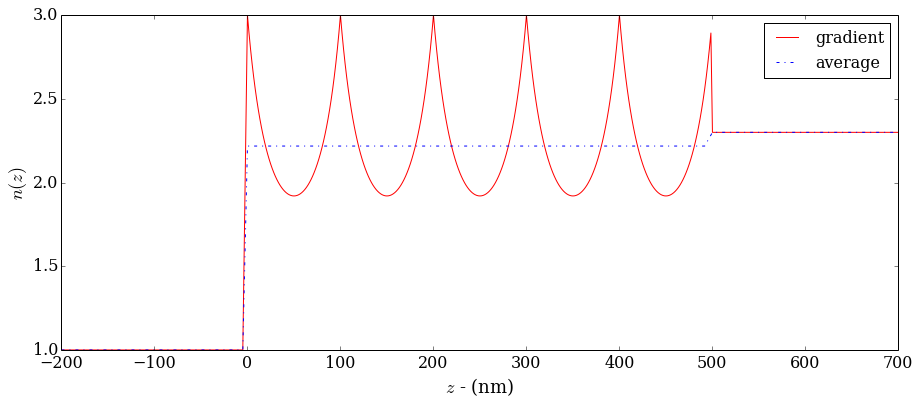

In [2]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 1.0*constants.tera
l_0 = constants.c/freq
theta = 0.0

pc = TMM(freq, theta)
pc_avg = TMM(freq, theta)    ## multilayer replaced with an average homogenius slab

d_barrier = 100.0*constants.nano
n_0, n_1 = 1.0, 2.3

y_barrier = 0.75
conv = -1
s1 = -1*conv
s2 = 1*conv

n0_barrier = 3.0
n_layer = 100

n_p, d_p = pc.StaircaseGradientBarrier1D(n0_barrier, y_barrier, d_barrier, s1, s2, n_layer)

n_grad_layer = 5
n_p, d_p = pc.RepeatProfile(n_p, d_p, n_grad_layer)


#print(n_p)
#print(d_p)

pc.SetupMultilayer(n_0, n_1, n_p, d_p)

from Electromagnetics.GMTM import GMTM1D
import math

gmtm = GMTM1D()
gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2)
gmtm.SetMediumParams(n_grad_layer, n_0, n_1)


n_avg = n0_barrier*gmtm.GetUIntegral(0.0, d_barrier)/d_barrier
print('n_avg: ', n_avg)
pc_avg.SetupMultilayer(n_0, n_1, [n_avg], [n_grad_layer*d_barrier])

TM = pc.GetTMTotal()
print(TM)

T, R = pc.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

print(TM.dot(np.array([1.0, R])))

plot_TMM = False
plot_AVG = True

%pylab inline

d_sides = d_barrier*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60
[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts__, n_vec__] = gmtm.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts_avg, n_vec_avg] = pc_avg.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
            

figsize(15, 6)

fig = figure()
plot(z_pts__/constants.nano, np.real(n_vec__), 'r', label='gradient')
if plot_TMM:
    plot(z_pts/constants.nano, np.real(n_vec), 'b-.', label='staircased')
    #\plot(z_pts/constants.nano, np.imag(n_vec), 'b-.')
    
if plot_AVG:
    plot(z_pts_avg/constants.nano, np.real(n_vec_avg), 'b-.', label='average')
    #plot(z_pts_avg/constants.nano, np.imag(n_vec_avg), 'b-.')

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


ax = gca()
#ax.text(-d_sides, n_1*0.9, r'$y={}$'.format(y_barrier))
#ax.text(-d_sides, n_1*0.6, r'$E(z) forward$', color='red')
#ax.text(-d_sides, n_1*0.4, r'$E(z) backward$', color='blue')


import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'other', 'gradient', 'res-tun')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

savefig(os.path.join(dir_name, 'profile' + file_ext))


Populating the interactive namespace from numpy and matplotlib
Omega: 1.8737028625e+15 (1873702862499999.8+0j)
f_0:  1491.04536226
f_1:  99.4030241508


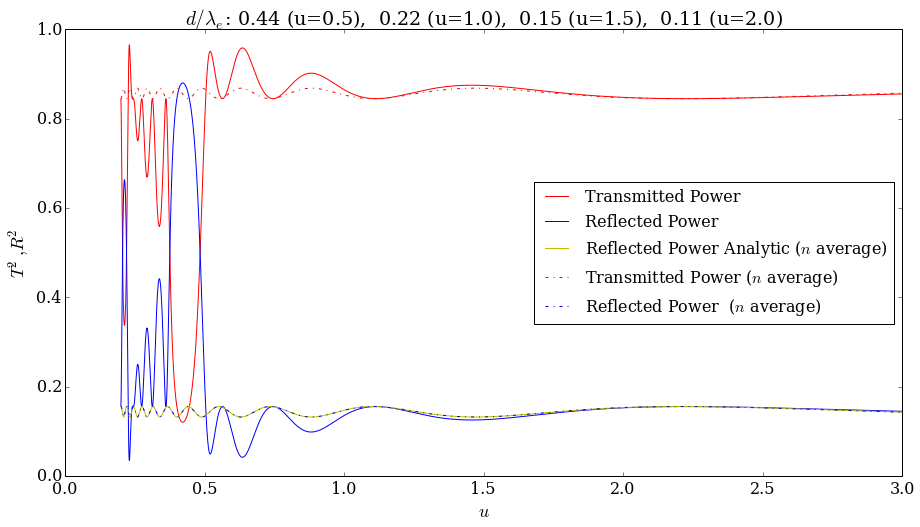

In [3]:
%pylab inline


Omega__ = abs(gmtm.GetOmega())
print('Omega:', Omega__, gmtm.GetOmega__())

u_0 = 0.2
u_1 = 3.0

f_0 = gmtm.uTomega(u_0)/(2.0*math.pi)  #1.0*constants.giga
f_1 = gmtm.uTomega(u_1)/(2.0*math.pi)  #150.0*constants.giga
print('f_0: ', f_0/constants.tera)
print('f_1: ', f_1/constants.tera)
N = 10000

#plot_TMM = True

figsize(15, 8)


f, T, R = gmtm.GetTransmissionReflection(f_0, f_1, N)
u = gmtm.omegaTou(2.0*math.pi*f)

#u = np.log(u)

plot(u, n_1/n_0*abs(T)**2, 'r', label='Transmitted Power')
plot(u, abs(R)**2, 'b', label='Reflected Power')


def R_3Medium(n_av, n, f):
    d = d_barrier*n_grad_layer
    omega = 2.0*math.pi*f
    t = np.tan(omega*d*n_av/constants.c)
    R = ((n-n_av**2)*t + 1j*n_av*(1.0 - n))/((n+n_av**2)*t + 1j*n_av*(1.0 + n))
    return R

plot_3M_ANAL = True
if plot_3M_ANAL:
    f = np.linspace(f_0, f_1, N)
    u = gmtm.omegaTou(2.0*math.pi*f)
    R = R_3Medium(n_avg, n_1, f)
    plot(u, np.abs(R)**2, 'y', label='Reflected Power Analytic ($n$ average)')



if plot_TMM:
    f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)
    plot(u, n_1/n_0*abs(T)**2, 'r-.', label='Transmitted Power TMM')
    plot(u, abs(R)**2, 'b-.', label='Reflected Power TMM')

if plot_AVG:
    f, T, R = pc_avg.GetTransmissionReflectionFreqBand(f_0, f_1, N)
    plot(u, n_1/n_0*abs(T)**2, 'r-.', label='Transmitted Power ($n$ average)')
    plot(u, abs(R)**2, 'b-.', label='Reflected Power  ($n$ average)')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$u$', fontsize=18)
ylabel('$T^2, R^2$', fontsize=18)
legend(loc='best', fontsize=16)

d___lamb_0_5 = d_barrier/(constants.c/(gmtm.uTomega(0.5)/(2.0*math.pi)))*n_avg
d___lamb_1_0 = d_barrier/(constants.c/(gmtm.uTomega(1.0)/(2.0*math.pi)))*n_avg
d___lamb_1_5 = d_barrier/(constants.c/(gmtm.uTomega(1.5)/(2.0*math.pi)))*n_avg
d___lamb_2_0 = d_barrier/(constants.c/(gmtm.uTomega(2.0)/(2.0*math.pi)))*n_avg

title('$d/\lambda_e$: {:3.2f} (u={}),  {:3.2f} (u={}),  {:3.2f} (u={}),  {:3.2f} (u={})'.format(d___lamb_0_5, 0.5, d___lamb_1_0, 1.0, d___lamb_1_5, 1.5, d___lamb_2_0, 2.0))

savefig(os.path.join(dir_name , 'TransRefl' + file_ext))



Populating the interactive namespace from numpy and matplotlib
f__0:  149.104536226
wavelength:  2.0106192983e-06  =  20.106192983  (d)
D/lambda_0 =  0.248679598581
D/lambda_d_avg =  0.551589000382
p :  18750000.0
Omega/omega:  2.0
N : 1.73205080757j
q : 16237976.321j
qd:  1.6237976321j


`%pylab --no-import-all` prevents importing * from pylab and numpy


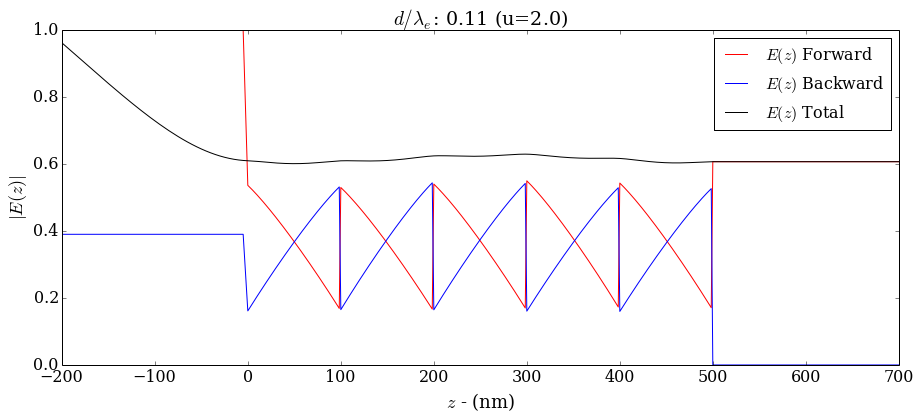

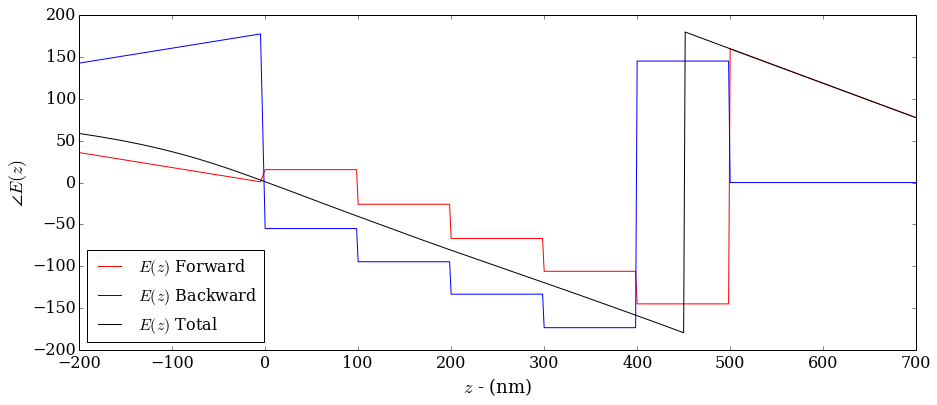

T: (-0.569802300552+0.20950400948j)  ---  0.60709685529
R: (-0.390113528823+0.0104054655104j)  ---  0.390252276205
power: 
T_P: 0.847703160917
R_P: 0.152296839083


In [4]:
%pylab inline

u__0 = 2.0
f__0 = gmtm.uTomega(u__0)/(2.0*math.pi)
pc.SetFrequency(f__0)
print('f__0: ', f__0/constants.tera)

lamb__0 = constants.c/f__0
print('wavelength: ', lamb__0, ' = ', lamb__0/d_barrier, ' (d)')

print('D/lambda_0 = ', d_barrier*n_grad_layer/lamb__0)
print('D/lambda_d_avg = ', d_barrier*n_grad_layer/lamb__0*n_avg)

d___lamb = d_barrier/lamb__0*n_avg

p__ = gmtm.GetP()
Omega__ = gmtm.GetOmega()
N__ = gmtm.GetN(2.0*math.pi*f__0)
q__ = gmtm.Getq(2.0*math.pi*f__0)

print('p : ', p__)
print('Omega/omega: ', Omega__/(2.0*math.pi*f__0))
print('N :', N__)
print('q :', q__)
print('qd: ', q__*d_barrier)

           
figsize(15, 6)

[z_pts, E_FWD, E_BWD] = gmtm.GetFieldPlot(f__0, n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
plot(z_pts/constants.nano, np.abs(E_FWD), 'r', label='$E(z)$ Forward')
plot(z_pts/constants.nano, np.abs(E_BWD), 'b', label='$E(z)$ Backward')
plot(z_pts/constants.nano, np.abs(E_FWD+E_BWD), 'k', label='$E(z)$ Total')

#plot(z_pts, n_vec__*np.abs(E_FWD)**2, 'r-.')

if plot_TMM:
    [z_pts, E_FWD, E_BWD] = pc.GetFieldPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
    plot(z_pts/constants.nano, np.abs(E_FWD), 'r-.')
    plot(z_pts/constants.nano, np.abs(E_BWD), 'b-.')
    plot(z_pts/constants.nano, np.abs(E_FWD+E_BWD), 'k-.')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$|E(z)|$', fontsize=18)
legend(loc='best', fontsize=16)

title('$d/\lambda_e$: {:3.2f} (u={})'.format(d___lamb, u__0))

savefig(dir_name + '/E_mag' + file_ext)

show()

[z_pts, E_FWD, E_BWD] = gmtm.GetFieldPlot(f__0, n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
E_FWD, E_BWD = np.conjugate(E_FWD), np.conjugate(E_BWD)
plot(z_pts/constants.nano, np.angle(E_FWD, deg=True), 'r', label='$E(z)$ Forward')
plot(z_pts/constants.nano, np.angle(E_BWD, deg=True), 'b', label='$E(z)$ Backward')
plot(z_pts/constants.nano, np.angle(E_FWD+E_BWD, deg=True), 'k', label='$E(z)$ Total')


if plot_TMM:
    [z_pts, E_FWD, E_BWD] = pc.GetFieldPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
    plot(z_pts/constants.nano, np.angle(E_FWD, deg=True), 'r-.')
    plot(z_pts/constants.nano, np.angle(E_BWD, deg=True), 'b-.')
    plot(z_pts/constants.nano, np.angle(E_FWD+E_BWD, deg=True), 'k-.')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$\\angle E(z)$', fontsize=18)
legend(loc='best', fontsize=16)

savefig(dir_name + '/E_phase' + file_ext)
show()


T, R = pc.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

print('power: ')
print('T_P:', n_1*abs(T)**2)
print('R_P:', n_0*abs(R)**2)


In [4]:
%pylab tk
import time

figsize(15, 8)

omega__0 = 2.0*math.pi*f__0
T__0 = 1/f__0
T_max = 3.0*T__0
d_t = T__0/40
n_t = int(T_max/d_t)

[z_pts__, n_vec__] = gmtm.GetMediumPlot(40, 30, 40, d_sides, d_sides)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


for i in range(n_t):
    t_i = i*d_t
    clf()
    plot(z_pts, np.real((E_FWD+E_BWD)*exp(1j*omega__0*t_i)), 'r')
    #plot(z_pts, np.real((E_FWD)*exp(1j*omega__0*t_i)), 'b')
    #plot(z_pts__, np.real(n_vec__) - n_avg, 'b-.')
    axes = gca()
    #axes.set_xlim([xmin,xmax])
    axes.set_ylim([-1.5, 1.5])
    for j in range(n_grad_layer+1):
        axvline(x=0.0+j*d_barrier, linestyle='-.', linewidth=1, color='k')
    axhline(y=0.0, linestyle='-.', linewidth=1, color='k')
    xlabel('$z$', fontsize=18)
    ylabel('$E(z)$', fontsize=18)
    title('$u = {}$,  $d/\lambda_e$= {:3.2f}'.format(u__0, d___lamb))
    draw()
    time.sleep(0.1)


Populating the interactive namespace from numpy and matplotlib


In [7]:
%pylab tk

from matplotlib import pyplot as plt
from matplotlib import animation

import time

figsize(15, 8)

omega__0 = 2.0*math.pi*f__0
T__0 = 1/f__0
T_max = 3.0*T__0
d_t = T__0/40
n_t = int(T_max/d_t)

[z_pts__, n_vec__] = gmtm.GetMediumPlot(40, 30, 40, d_sides, d_sides)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

def animate(i):
    t_i = i*d_t
    clf()
    fig = plot(z_pts//constants.nano, np.real((E_FWD+E_BWD)*exp(1j*omega__0*t_i)), 'r')
    #plot(z_pts, np.real((E_FWD)*exp(1j*omega__0*t_i)), 'b')
    #fig = plot(z_pts__, np.real(n_vec__) - n_avg, 'b-.')
    axes = gca()
    #axes.set_xlim([xmin,xmax])
    axes.set_ylim([-1.5, 1.5])
    for j in range(n_grad_layer+1):
        axvline(x=(0.0+j*d_barrier)/constants.nano, linestyle='-.', linewidth=1, color='k')
    axhline(y=0.0, linestyle='-.', linewidth=1, color='k')
    xlabel('$z$ - (nm)', fontsize=18)
    ylabel('$E(z)$', fontsize=18)
    title('$u = {}$,  $d/\lambda_e$= {:3.2f}'.format(u__0, d___lamb))
    return fig
    
fig = plt.figure()
axes = gca()
axes.set_ylim([-1.5, 1.5])
    
anim = animation.FuncAnimation(fig, animate, frames=200, interval=50)

#writer: avconv, ffmpeg, mencoder
#extra_args=['-vcodec', 'libx264']
anim.save(dir_name+'/E_animation.mp4', writer='mencoder', dpi=200)



Populating the interactive namespace from numpy and matplotlib


### Gradient multilayer with different layers

n_avg:  3.42719834365
Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


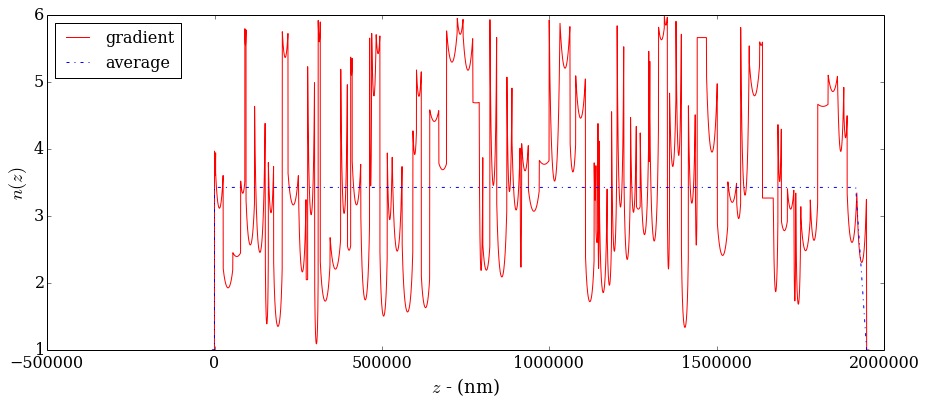

In [81]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
from Electromagnetics.GMTM import GMTM1D_ML
import math
from numpy.random import random

freq = 1.0*constants.tera
l_0 = constants.c/freq
theta = 0.0

pc = TMM(freq, theta)
pc_avg = TMM(freq, theta)    ## multilayer replaced with an average homogeneous slab

N_layer_gm = 100
d_barrier = l_0/10*(random(N_layer_gm) + 0.1)
y_barrier = 1.0*random(N_layer_gm)
n0_barrier = 2.0 + 4.0*random(N_layer_gm)
conv = -1*np.ones(N_layer_gm)
s1 = -1*conv
s2 = 1*conv

n_0, n_1 = 1.0, 1.0


n_layer_tmm = 100
n_p, d_p = [], []
for i in range(len(d_barrier)):
    n_p_i, d_p_i = pc.StaircaseGradientBarrier1D(n0_barrier[i], y_barrier[i], d_barrier[i], s1[i], s2[i], n_layer_tmm)
    n_p = n_p + list(n_p_i)
    d_p = d_p + list(d_p_i)
n_p = np.array(n_p)
d_p = np.array(d_p)

pc.SetupMultilayer(n_0, n_1, n_p, d_p)

gmtm = GMTM1D_ML()
gmtm.SetProfileParameters(n0_barrier, y_barrier, d_barrier, s1, s2)
gmtm.SetMediumParams(n_0, n_1)


n_avg = gmtm.GetnAverage()
print('n_avg: ', n_avg)
pc_avg.SetupMultilayer(n_0, n_1, [n_avg], [sum(d_barrier)])


plot_TMM = False
plot_AVG = True

%pylab inline

d_sides = d_barrier[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60
[z_pts_tm, n_vec_tm] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts_gm, n_vec_gm] = gmtm.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
[z_pts_avg, n_vec_avg] = pc_avg.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
            

figsize(15, 6)

fig = figure()
plot(z_pts_gm/constants.nano, np.real(n_vec_gm), 'r', label='gradient')
if plot_TMM:
    plot(z_pts_tm/constants.nano, np.real(n_vec_tm), 'b-.', label='staircased')
    #\plot(z_pts/constants.nano, np.imag(n_vec), 'b-.')
    
if plot_AVG:
    plot(z_pts_avg/constants.nano, np.real(n_vec_avg), 'b-.', label='average')
    #plot(z_pts_avg/constants.nano, np.imag(n_vec_avg), 'b-.')

xlabel('$z$ - (nm)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


ax = gca()
#ax.text(-d_sides, n_1*0.9, r'$y={}$'.format(y_barrier))
#ax.text(-d_sides, n_1*0.6, r'$E(z) forward$', color='red')
#ax.text(-d_sides, n_1*0.4, r'$E(z) backward$', color='blue')


import os
dir_name = './other/gradient/res-tun'
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

savefig(dir_name + '/profile' + file_ext)


Populating the interactive namespace from numpy and matplotlib
Omega__ :  [  1.52076026e+13   3.22505654e+12   3.88285371e+12   1.63410160e+12
   3.26863306e+12   6.24747134e+12   4.15478206e+12   5.24364127e+12
   3.08560489e+13   5.49673607e+12   1.10547923e+13   1.68712651e+12
   2.17832565e+12   7.30444256e+12   3.54564125e+12   6.20871225e+12
   3.60886252e+13   3.93219529e+12   5.94146952e+12   3.58570725e+12
   6.37035289e+12   4.06208050e+12   5.86079402e+12   3.03489489e+12
   8.39262009e+12   1.77316449e+13   3.77523609e+12   2.19645947e+12
   1.13177499e+13   6.97147060e+12   4.87542510e+12   7.43134864e+12
   4.15540181e+12   2.38423426e+12   6.92104773e+12   9.66571246e+11
   1.11314123e+12   1.00803752e+12   1.20272184e+12   1.19370735e+12
   2.53601927e+11   1.77081816e+13   4.97557846e+12   5.49567868e+12
   5.53016246e+12   6.76095859e+12   3.96695202e+12   3.80299633e+13
   2.55384473e+12   1.84526183e+12   6.67033270e+11   3.36067861e+12
   1.29378571e+12   3.1947705

`%pylab --no-import-all` prevents importing * from pylab and numpy


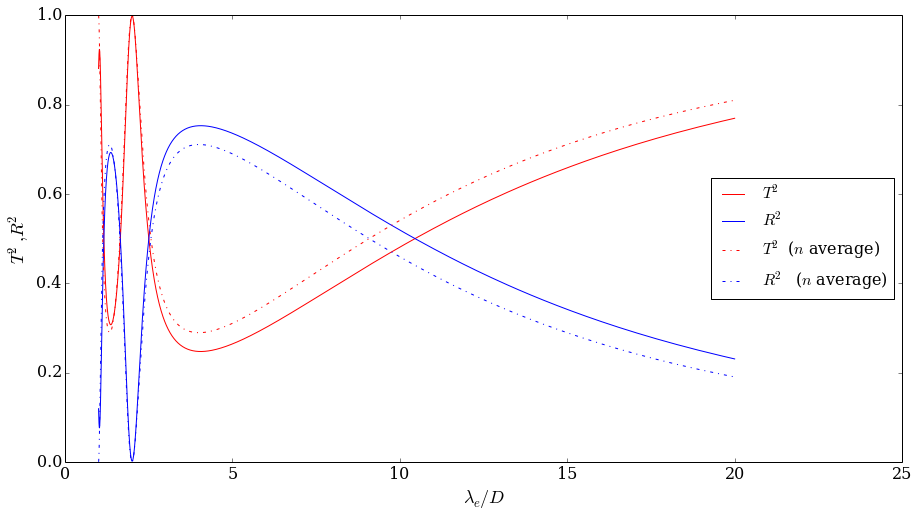

In [84]:
%pylab inline

Omega__ = gmtm.GetOmega()
print('Omega__ : ', Omega__)

D = sum(d_barrier)
lam_0 = D*n_avg
lam_1 = 20.0*D*n_avg

f_0 = constants.c/lam_0 #Omega__[0]
f_1 = constants.c/lam_1
print('f_0: ', f_0/constants.tera)
print('f_1: ', f_1/constants.tera)
N = 1000

#plot_TMM = True

figsize(15, 8)


f, T, R = gmtm.GetTransmissionReflection(f_0, f_1, N)
u = gmtm.omegaTou(0, 2.0*math.pi*f)

lambda_0 = constants.c/f
lambda_avg = lambda_0/n_avg
lambda_avg_d = lambda_avg/sum(d_barrier)

#u = np.log(u)

plot(lambda_avg_d, n_1/n_0*abs(T)**2, 'r', label='$T^2$')
plot(lambda_avg_d, abs(R)**2, 'b', label='$R^2$')



if plot_TMM:
    f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)
    plot(lambda_avg_d, n_1/n_0*abs(T)**2, 'r-.', label='$T^2$ TMM', linewidth=2)
    plot(lambda_avg_d, abs(R)**2, 'b-.', label='$R^2$ TMM', linewidth=2)

if plot_AVG:
    f, T, R = pc_avg.GetTransmissionReflectionFreqBand(f_0, f_1, N)
    plot(lambda_avg_d, n_1/n_0*abs(T)**2, 'r-.', label='$T^2$ ($n$ average)')
    plot(lambda_avg_d, abs(R)**2, 'b-.', label='$R^2$  ($n$ average)')

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

xlabel('$\\lambda_{e} / D$', fontsize=18)
ylabel('$T^2, R^2$', fontsize=18)
legend(loc='best', fontsize=16)


savefig(dir_name + '/TransRefl' + file_ext)

